In [1]:
%config Completer.use_jedi = False

In [2]:
from utils import *

In [3]:
import numpy as np
from matplotlib import pyplot as plt
import importlib

In [4]:
plt.rcParams["figure.facecolor"] = "white"
plt.rcParams["figure.dpi"] = 150

In [5]:
from ising_model import Simulate_MH

In [6]:
from multiprocessing import Pool

In [7]:
from parallel import to_run

In [8]:
from scipy.signal import convolve

def moving_average(x, w, stride=1):
    s = (x.shape[0]//stride)*stride
    x = x[-s:]
    x = x.reshape((x.shape[0]//stride, stride))
    assert w % stride == 0
    
    return convolve(x, np.ones((w//stride, stride)), 'valid')[:,0] / w

def moving_mean_err(x, w, stride):
    mean_x_square = moving_average(x**2, w, stride)
    mean_x = moving_average(x, w, stride)
    err = np.sqrt(mean_x_square - mean_x**2)/np.sqrt(w)
    return mean_x, err

In [9]:
def cum_mean_err(x):
    x = x[::-1]

    csx = np.cumsum(x)
    csx2 = np.cumsum((x**2).astype("float64"))
    n = np.arange(1, len(x)+1)
    cmeanx = csx/n
    cmx2 = csx2/n
    cstdx = np.sqrt(cmx2-cmeanx**2+1e-3)
    cerrx = cstdx / np.sqrt(n)
    return cmeanx[::-1], cerrx[::-1]

In [11]:
Ms, Es = to_run(1, 500_000, 10, 32, 10, 45)

1


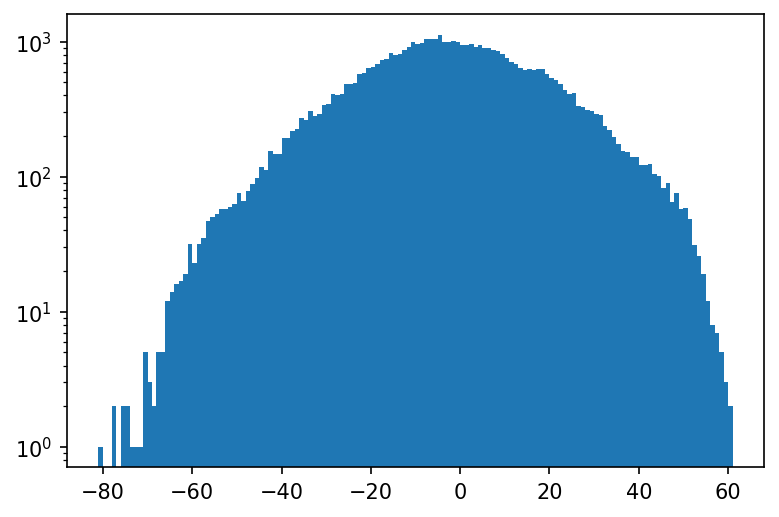

In [12]:
Mss = Ms//2
plt.hist(Mss, bins=(Mss.max()-Mss.min()), range=(Mss.min(), Mss.max()), log=True);

In [61]:
len(Ms)

50000000

fraction: 0.10


<ErrorbarContainer object of 3 artists>

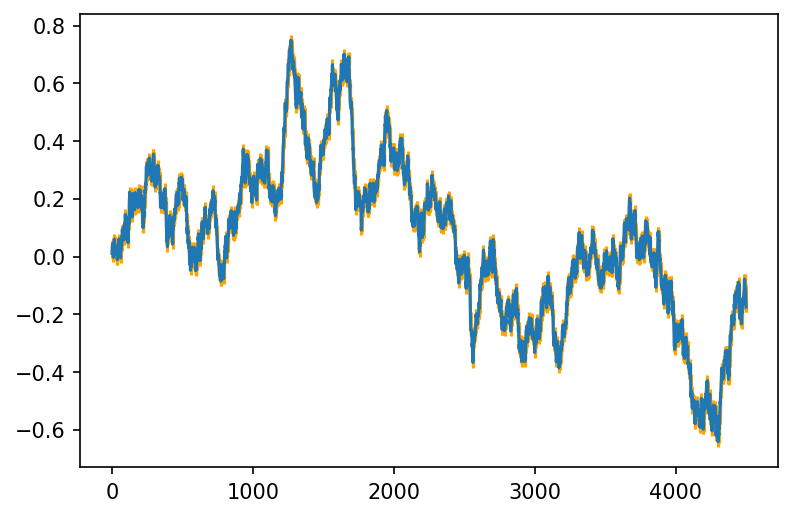

In [63]:
sp = 1
window = 5*10**6
print(f"fraction: {window/len(Ms):0.2f}", )
mean, err = moving_mean_err(Ms, window, stride=10000)
plt.errorbar(np.arange(len(mean))[::sp], mean[::sp], yerr=err[::sp], ecolor="orange", )

In [13]:
pool = Pool(4)

2.0
0.0
6.0
4.0


In [14]:
runs = 20
result = pool.starmap(to_run, 
        np.stack((np.arange(runs),
                  [100_000_000]*runs, # steps
                  np.linspace(0,20,runs), # temperature
                  [32]*runs, # lattice size
                  [10]*runs, # frequency
                  np.random.randint(0,1000000, runs)), axis=1)
    )

KeyboardInterrupt: 

-0.07819201997780247
-0.066543820199778
0.04003041065482796
-0.01550086792452831


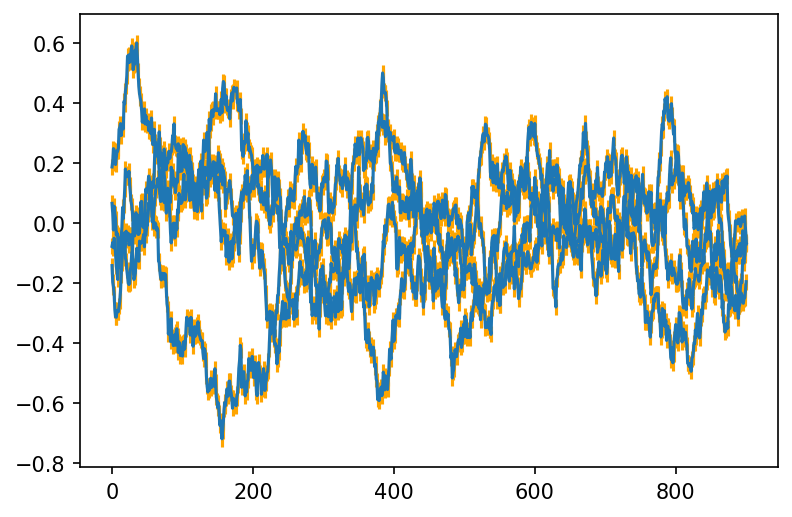

In [13]:
sp = 1

for i,(Ms, Es) in enumerate(result):
#     print(i, end="")
    mean, err = moving_mean_err(Ms, 10**6, stride=10000)
    print(mean.mean())
    plt.errorbar(np.arange(len(mean))[::sp], mean[::sp], yerr=err[::sp], ecolor="orange", label=f"{i}")
# plt.legend()

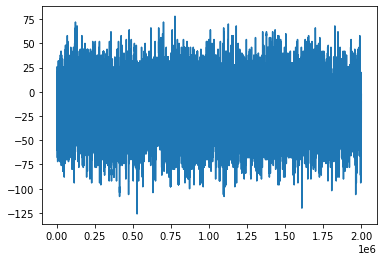

In [10]:
plt.plot(engine.get_sampled_E())

In [6]:
engine.FLIPS

0

In [ ]:
np.